In [7]:
import pandas as pd

### Read the data frame

In [8]:
music_data = pd.read_csv('music.csv')

In [9]:
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [11]:
music_data.shape

(18, 3)

### Preparing data

In [12]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


### EDA

In [13]:
import matplotlib.pyplot as plt

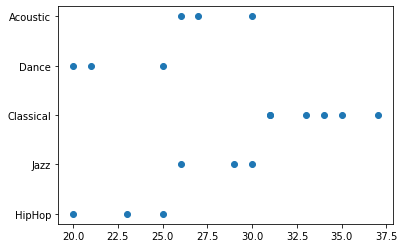

In [15]:
plt.scatter(music_data['age'],music_data['genre'])

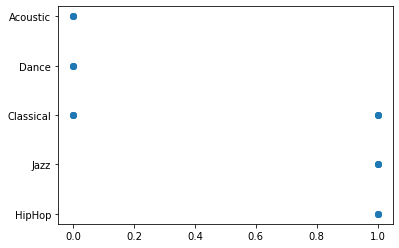

In [14]:
plt.scatter(music_data['gender'],music_data['genre'])

In [16]:
X = music_data[['age','gender']]

In [17]:
y=music_data['genre']

In [18]:
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [19]:
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

### Train/test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)


In [21]:
X_train

,age,gender
16,34,0
15,31,0
11,25,0
2,25,1
9,20,0
17,35,0
4,29,1
12,26,0
7,33,1
10,21,0


### Train the model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
modelm = DecisionTreeClassifier()

In [25]:
modelm.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
X_train

,age,gender
16,34,0
15,31,0
11,25,0
2,25,1
9,20,0
17,35,0
4,29,1
12,26,0
7,33,1
10,21,0


### Model prediction performance

In [27]:
modelm.score(X_train,y_train)

1.0

In [28]:
modelm.score(X_test,y_test)

1.0

### Compare the results

In [29]:
y_predict = modelm.predict(X_test)

In [30]:
y_predict

array(['HipHop', 'HipHop', 'Classical', 'Jazz', 'Jazz', 'Acoustic'],
      dtype=object)

### Compare actual value and predicted value using a data frame

In [32]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_predict})

In [33]:
df

,Actual,Prediction
0,HipHop,HipHop
1,HipHop,HipHop
8,Classical,Classical
5,Jazz,Jazz
3,Jazz,Jazz
13,Acoustic,Acoustic


### Prediction on new samples

In [34]:
modelm.predict([[40,1]])

array(['Classical'], dtype=object)

In [35]:
modelm.predict([[39,0]])

array(['Classical'], dtype=object)

### Save the model using joblib

In [36]:
import joblib
joblib.dump(modelm,'model_job')

['model_job']

### Load the model

In [37]:
model = joblib.load('model_job')

In [38]:
model.predict([[23,0]])

array(['Dance'], dtype=object)

### Train for the entire data set before deployment

In [39]:
X = music_data[['age','gender']]
y = music_data['genre']

In [40]:
modelm = DecisionTreeClassifier()

In [41]:
modelm.fit(X,y)

DecisionTreeClassifier()

### Save the model

In [42]:
import joblib
joblib.dump(modelm,'model_joblib')

['model_joblib']

In [43]:
model = joblib.load('model_joblib')

In [44]:
model.predict([[24,1]])

array(['HipHop'], dtype=object)

### GUI

In [45]:
import joblib
def show_entry_fields():
    r1=str(q1.get())
    r2=str(q2.get())
    
    model=joblib.load('model_joblib')
    result = model.predict([[r1,r2]])
    
    Label(master,text='Genre is  ').grid(row=4)
    Label(master,text=result).grid(row=5)
    
    print("Genre is  ", result)
    
    

from tkinter import *


master = Tk()
master.title("Predict genre using ML")
label = Label(master, text = " Predict genre using ML",bg ='white',fg='black').grid(row=0,columnspan=2)

Label(master, text= "Enter Age").grid(row=1)
Label(master, text= "Enter Gender").grid(row=2)

q1 = Entry(master)
q2 = Entry(master)

q1.grid(row=1,column=1)
q2.grid(row=2,column=1)
Button(master, text='predict',command=show_entry_fields).grid()

mainloop()



Genre is   ['HipHop']


### Visualizing a Decision Tree

In [47]:
from sklearn import tree
tree.export_graphviz(model, out_file='music-recommender.dot',
                    feature_names=['age','gender'],
                    class_names = sorted(y.unique()),
                     label='all',
                     rounded=True,
                     filled=True)